In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

file_path = "/Users/marchen/Desktop/programming/AI/Fifth week/file/abalone.csv"
df = pd.read_csv(file_path)

In [33]:
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [34]:
df = df.dropna()
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

# 성별 데이터를 숫자로 변환
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

## 회귀에선 원-핫 인코딩이 불필요함

In [36]:
X = df.drop('Rings', axis = 1)
X.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [37]:
y = df['Rings'].values

In [38]:
X

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [39]:
y

array([15,  7,  9, ...,  9, 10, 12])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((1254, 9), (1254,), (2923, 9), (2923,))

In [41]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(20,input_shape=(X_train.shape[1],),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

/Users/marchen/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,791 (7.00 KB)

 Trainable params: 1,791 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
N_EPOCHS = 20

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1397.3344 - mse: 1397.3344 - val_loss: 203.0002 - val_mse: 203.0002
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 180.5722 - mse: 180.5722 - val_loss: 39.2102 - val_mse: 39.2102
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 130.7529 - mse: 130.7529 - val_loss: 185.5412 - val_mse: 185.5412
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113.0372 - mse: 113.0372 - val_loss: 34.4289 - val_mse: 34.4289
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 111.8999 - mse: 111.8999 - val_loss: 40.1234 - val_mse: 40.1234
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.0746 - mse: 93.0746 - val_loss: 474.5227 - val_mse: 474.5227
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 125.2494 - mse: 125.2494 - val_loss: 116.2144 - val_mse: 116.2144
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 91.3414 - mse: 91.3414 - val_loss: 244.4988 - val_mse: 244.4988
Epoch 9/20
92/92

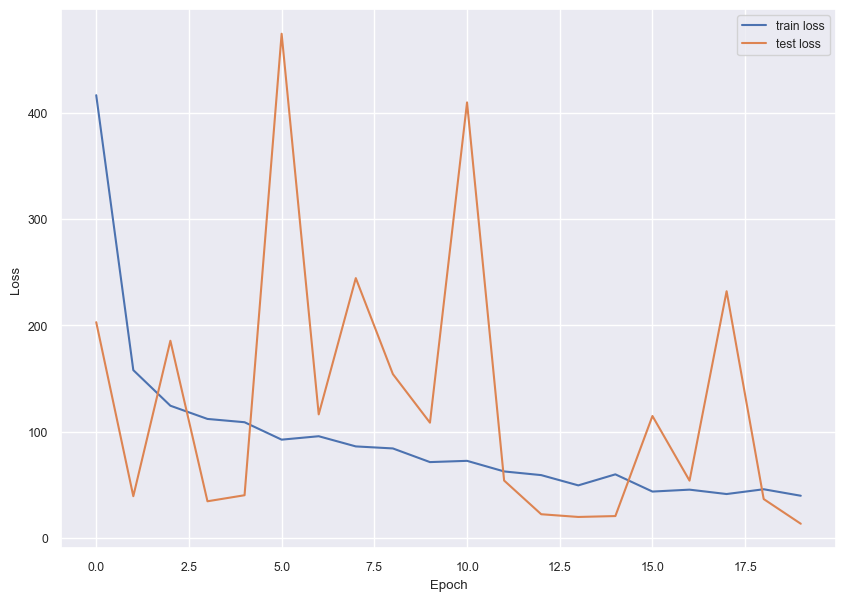

In [43]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

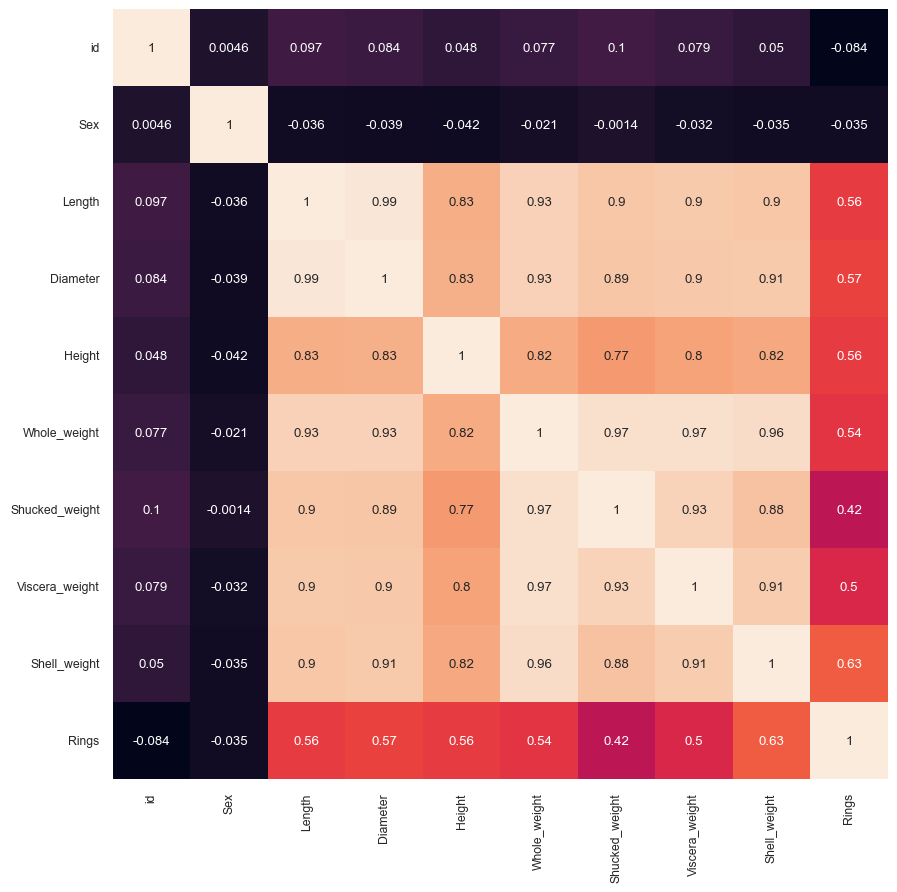

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [45]:
model.evaluate(X_test, y_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 14.1114 - mse: 14.1114


[13.277762413024902, 13.277762413024902]